# Titanic Classification Project

In [1]:
import pandas as pd
from pycaret.classification import * 
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.impute import SimpleImputer
import numpy as np

## Reading in training and test data set

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_copy = train_df.copy()
test_copy = test_df.copy()

## Exploring training data 

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
profile1 = ProfileReport(train_df)
profile1.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
profile2 = ProfileReport(test_df)
profile2.to_widgets()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Cleaning Data

In [7]:
train_df = train_df.drop(['Cabin',"Ticket","Name","PassengerId"], axis=1)
test_df = test_df.drop(['Cabin',"Ticket","Name","PassengerId"], axis=1)

In [8]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [9]:
train_df.dropna(subset=['Embarked'],inplace = True)
test_df.dropna(subset=['Embarked'],inplace = True)

In [10]:
train_df['Embarked'].unique()
test_df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [11]:
Emb_coding = {"Embarked": {"S":0, "C":1, "Q":2}}
Sex_coding = {"Sex": {"male":0, "female": 1}}

In [12]:
train_df.replace(Emb_coding, inplace = True)
train_df.replace(Sex_coding, inplace = True)
test_df.replace(Emb_coding, inplace = True)
test_df.replace(Sex_coding, inplace = True)

In [13]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [14]:
train_df['Embarked'].unique()

array([0, 1, 2], dtype=int64)

In [15]:
train_df["Sex"].unique()

array([0, 1], dtype=int64)

## Imputing missing values

In [20]:
imr = SimpleImputer(missing_values = np.nan)
imr2 = SimpleImputer(missing_values = np.nan)

In [21]:
imr.fit(train_df)
imr2.fit(test_df)

SimpleImputer()

In [22]:
imputed_data = imr.transform(train_df.values)
imputed_data2 = imr2.transform(test_df.values)

In [23]:
imputed_data = pd.DataFrame(imputed_data, columns = train_df.columns)
imputed_data2 = pd.DataFrame(imputed_data2, columns = test_df.columns)

In [24]:
imputed_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,0.0,22.0,1.0,0.0,7.2500,0.0
1,1.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.0
2,1.0,3.0,1.0,26.0,0.0,0.0,7.9250,0.0
3,1.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0
4,0.0,3.0,0.0,35.0,0.0,0.0,8.0500,0.0


## Creating Classification Model

In [36]:
clas = setup(imputed_data, target = 'Survived', numeric_features = ["Age","SibSp","Parch"])

,Description,Value
0,session_id,3670
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(889, 8)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [38]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8298,0.8523,0.6960,0.8252,0.7496,0.6234,0.6327,0.2000
gbc,Gradient Boosting Classifier,0.8136,0.8502,0.6830,0.7940,0.7294,0.5896,0.5971,0.0090
qda,Quadratic Discriminant Analysis,0.8104,0.8501,0.7002,0.7779,0.7330,0.5872,0.5925,0.0020
lightgbm,Light Gradient Boosting Machine,0.8103,0.8442,0.7127,0.7653,0.7366,0.5889,0.5911,0.0280
rf,Random Forest Classifier,0.8089,0.8421,0.7172,0.7617,0.7364,0.5871,0.5898,0.0250
lr,Logistic Regression,0.7991,0.8545,0.7083,0.7489,0.7229,0.5664,0.5714,0.0040
nb,Naive Bayes,0.7959,0.8316,0.7168,0.7422,0.7244,0.5629,0.5675,0.0020
ada,Ada Boost Classifier,0.7944,0.8387,0.7216,0.7303,0.7233,0.5599,0.5627,0.0090
ridge,Ridge Classifier,0.7943,0.0000,0.6958,0.7495,0.7162,0.5560,0.5618,0.0020
lda,Linear Discriminant Analysis,0.7943,0.8545,0.6958,0.7495,0.7162,0.5560,0.5618,0.0020


In [39]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.7682,0.6250,0.7500,0.6818,0.5132,0.5183
1,0.8095,0.8451,0.7500,0.7500,0.7500,0.5962,0.5962
2,0.8387,0.8751,0.7826,0.7826,0.7826,0.6544,0.6544
3,0.8226,0.8484,0.7826,0.7500,0.7660,0.6232,0.6236
4,0.8065,0.8294,0.6522,0.7895,0.7143,0.5699,0.5759
5,0.8548,0.8852,0.7391,0.8500,0.7907,0.6804,0.6843
6,0.8548,0.9387,0.8261,0.7917,0.8085,0.6917,0.6921
7,0.7903,0.8417,0.6522,0.7500,0.6977,0.5384,0.5415
8,0.7581,0.7793,0.6087,0.7000,0.6512,0.4674,0.4700
9,0.7903,0.8311,0.7083,0.7391,0.7234,0.5547,0.5550


In [40]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7460,0.7874,0.5417,0.7222,0.6190,0.4343,0.4445
1,0.8095,0.8632,0.7500,0.7500,0.7500,0.5962,0.5962
2,0.8871,0.8885,0.8696,0.8333,0.8511,0.7602,0.7607
3,0.8387,0.8484,0.7391,0.8095,0.7727,0.6481,0.6497
4,0.7742,0.8495,0.6087,0.7368,0.6667,0.4983,0.5035
5,0.8387,0.8919,0.6957,0.8421,0.7619,0.6416,0.6483
6,0.8710,0.9309,0.8696,0.8000,0.8333,0.7284,0.7301
7,0.8065,0.8450,0.6957,0.7619,0.7273,0.5778,0.5792
8,0.8226,0.8227,0.6522,0.8333,0.7317,0.6021,0.6122
9,0.8226,0.8410,0.6250,0.8824,0.7317,0.6049,0.6249


In [29]:
pred_survival = predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8202,0.8755,0.7692,0.7692,0.7692,0.6220,0.6220


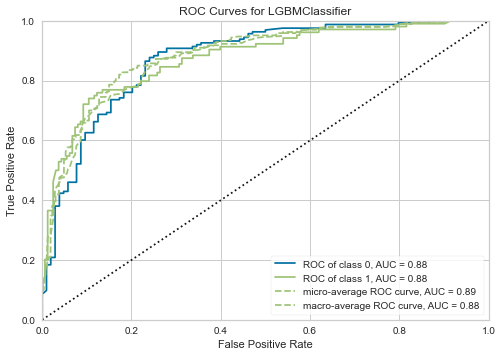

In [30]:
plot_model(lightgbm)

In [34]:
lightgbm_final = finalize_model(lightgbm)

In [35]:
predictions = predict_model(lightgbm_final, data = imputed_data2)

In [41]:
predictions

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Label,Score
0,3.0,0.0,34.50000,0.0,0.0,7.8292,2.0,0.0,0.9842
1,3.0,1.0,47.00000,1.0,0.0,7.0000,0.0,0.0,0.9136
2,2.0,0.0,62.00000,0.0,0.0,9.6875,2.0,0.0,0.9476
3,3.0,0.0,27.00000,0.0,0.0,8.6625,0.0,1.0,0.6474
4,3.0,1.0,22.00000,1.0,1.0,12.2875,0.0,0.0,0.7822
...,...,...,...,...,...,...,...,...,...
413,3.0,0.0,30.27259,0.0,0.0,8.0500,0.0,0.0,0.7925
414,1.0,1.0,39.00000,0.0,0.0,108.9000,1.0,1.0,0.9952
415,3.0,0.0,38.50000,0.0,0.0,7.2500,0.0,0.0,0.9981
416,3.0,0.0,30.27259,0.0,0.0,8.0500,0.0,0.0,0.7925
